**Table of contents**<a id='toc0_'></a>    
- 0. [Imports](#toc1_)    
- 1. [Basic Edgeworth box](#toc0_)   
  - 1.a [Finding pareto improvements](#toc0_)
  - 1.b [The set of pareto improvements in an Edgeworth box](#toc0_)  
- 2. [Market clearing error](#toc0_)
- 3. [Market clearing price](#toc0_)
- 4. [Utility maximization of consumer A](#toc0_)
  - 4.a [Allocation if only prices in P1 can be chosen](#toc0_)
  - 4.b [Allocation if any positive prices can be chosen](#toc0_)
- 5. [A is the market maker](#toc0_)
  - 5.a [Allocation restricted to C](#toc0_)
  - 5.b [Allocation if no further restrictions are imposed](#toc0_)
- 6. [Maximization of aggregate utility](#toc0_)
  - 6.a [Allocation when consumption is chosen by social planner](#toc0_)
  - 6.b [XX](#toc0_)
- 7. [Random set of endowments](#toc0_)
- 8. [Market equilibrium allocation with random set](#toc0_)
  - 8.a [Market equilibrium for each combination of endowments in set $W$](#toc0_)
  - 8.b [Plotting market equilibria in Edgeworth box](#toc0_)



<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 0. <a id='toc1_'></a>[Imports](#toc0_)

Imports and set magics:

In [85]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

import numpy as np

# We import autoreload modules to have the recent changes from the Python file. 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The model is set up by defining the utility functions for each consumer as well as the demand for each good for each consumer.

In [86]:
# We import our model class as "model"
from ExchangeEconomy import ExchangeEconomyClass
model = ExchangeEconomyClass()

## 1. <a id='toc2_'></a>[Basic Edgeworth box](#toc0_)

In a basic Edgeworth box all pairs of combinations of $x_1^A$ and $x_2^A$ that leave both consumers at least as well off as when they are consuming their endowments are plottet. This is done by looping though the possible values of $x_1^A$ and $x_2^A$ and finding the pairs that causes the utility of consumer A and B to be strictly larger than their utility when consuming their endowments. 

### 1.a <a id='toc2_1_'></a>[Finding pareto improvements](#toc0_)

In [87]:
#Find the pareto improvements relative to the endowment
result = model.find_pareto_improvements(N1=76, N2=76)

### 1.b <a id='toc2_1_'></a>[The set of pareto improvements in an Edgeworth box](#toc0_)

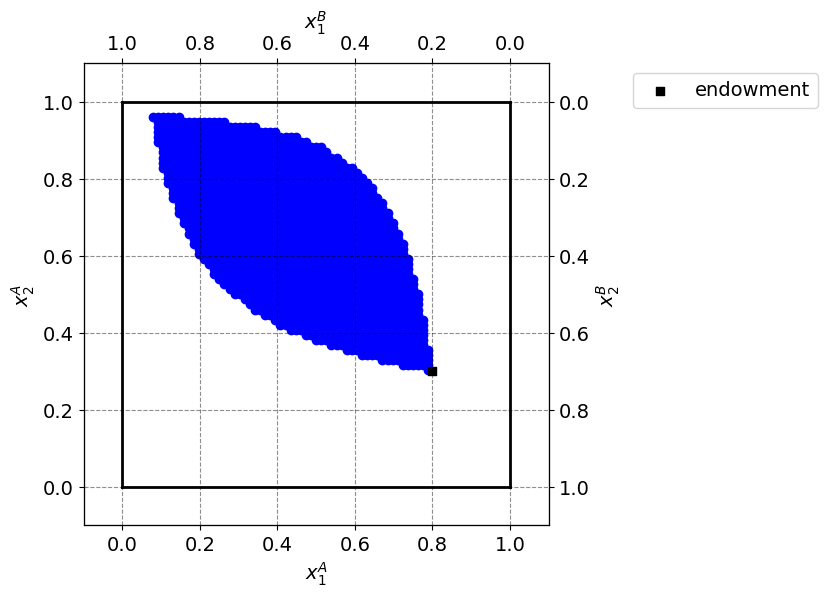

In [88]:
#Plotting the pareto improvements in an edgeworth box
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting all pairs of (x1A, x2A) in the Edgeworth box
for x1A, x2A in result:
    ax_A.scatter(x1A, x2A, marker='o', color='blue')

ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

## 2. <a id='toc2_'></a>[Market clearing error](#toc0_)

We calculate the error in the market clearing condition for the specified range of prices.

In [89]:
# Define prices 
p1_values = list(0.5 + 2 * (i / 75) for i in range(76))
p1_values_array = np.array(p1_values)

# Calculate market clearing error for both markets
model.check_market_clearing(p1 = p1_values_array)

(array([ 0.53333333,  0.47594937,  0.42409639,  0.37701149,  0.33406593,
         0.29473684,  0.25858586,  0.22524272,  0.19439252,  0.16576577,
         0.13913043,  0.11428571,  0.09105691,  0.06929134,  0.04885496,
         0.02962963,  0.01151079, -0.00559441, -0.02176871, -0.03708609,
        -0.0516129 , -0.06540881, -0.07852761, -0.09101796, -0.10292398,
        -0.11428571, -0.12513966, -0.13551913, -0.14545455, -0.15497382,
        -0.16410256, -0.17286432, -0.18128079, -0.18937198, -0.1971564 ,
        -0.20465116, -0.21187215, -0.21883408, -0.22555066, -0.23203463,
        -0.23829787, -0.24435146, -0.25020576, -0.25587045, -0.26135458,
        -0.26666667, -0.27181467, -0.27680608, -0.28164794, -0.28634686,
        -0.29090909, -0.2953405 , -0.29964664, -0.30383275, -0.30790378,
        -0.31186441, -0.31571906, -0.31947195, -0.32312704, -0.3266881 ,
        -0.33015873, -0.33354232, -0.33684211, -0.34006116, -0.34320242,
        -0.34626866, -0.34926254, -0.35218659, -0.3

## 3. <a id='toc2_'></a>[Market clearing price](#toc0_)

We use Walras' law and find the market clearing price that causes the error in the market for good 1 to equal zero. 

In [90]:
#Find the market clearing price
model.find_equilibrium(p_low = 0.93, p_high = 0.95)

p= 0.50, excess = 0.53
p= 0.53, excess = 0.48
p= 0.55, excess = 0.42
p= 0.58, excess = 0.38
p= 0.61, excess = 0.33
p= 0.63, excess = 0.29
p= 0.66, excess = 0.26
p= 0.69, excess = 0.23
p= 0.71, excess = 0.19
p= 0.74, excess = 0.17
p= 0.77, excess = 0.14
p= 0.79, excess = 0.11
p= 0.82, excess = 0.09
p= 0.85, excess = 0.07
p= 0.87, excess = 0.05
p= 0.90, excess = 0.03
p= 0.93, excess = 0.01
p= 0.95, excess = -0.01
p= 0.98, excess = -0.02
p= 1.01, excess = -0.04
p= 1.03, excess = -0.05
p= 1.06, excess = -0.07
p= 1.09, excess = -0.08
p= 1.11, excess = -0.09
p= 1.14, excess = -0.10
p= 1.17, excess = -0.11
p= 1.19, excess = -0.13
p= 1.22, excess = -0.14
p= 1.25, excess = -0.15
p= 1.27, excess = -0.15
p= 1.30, excess = -0.16
p= 1.33, excess = -0.17
p= 1.35, excess = -0.18
p= 1.38, excess = -0.19
p= 1.41, excess = -0.20
p= 1.43, excess = -0.20
p= 1.46, excess = -0.21
p= 1.49, excess = -0.22
p= 1.51, excess = -0.23
p= 1.54, excess = -0.23
p= 1.57, excess = -0.24
p= 1.59, excess = -0.24
p= 1.62, 

## 4. <a id='toc2_'></a>[Utility maximization of consumer A](#toc0_)

### 4.a <a id='toc2_1_'></a>[Allocation if only prices in P1 can be chosen](#toc0_)

In [91]:
p1_values = list(0.5 + 2 * (i / 75) for i in range(76))
p1_values_array = np.array(p1_values)

utility_best = -np.inf 
bedst_p1 = np.nan

# Iterate over each value of p1
for p1 in p1_values_array:
    # a. calculate A's demand and B's demand for goods 1 and 2 at price p1
    X1A, X2A = model.demand_A(p1)  # Use agent A's demand
    X1B, X2B = model.demand_B(p1)  # Use agent B's demand

    # b. Calculate the utility for agent A using the given formula
    utility = model.utility_A(1-X1B, 1-X2B)
    
    # c. Update the best utility and corresponding p1 if the current utility is higher
    if utility > utility_best:
        utility_best = utility
        bedst_p1 = p1
       #best_arguments = (X1A, X1A)  # Save demands directly

print(f'Best utility is {utility_best:.8f} at p1 = {bedst_p1:.8f}')
print(f' optimal allocation for A is as follows, x1: {1-X1B:.8f} and x2: {1-X2B:.8f}')


Best utility is 0.63361599 at p1 = 1.88666667
 optimal allocation for A is as follows, x1: 0.68000000 and x2: 0.60000000


/Users/claraengelund/Desktop/Programmer/projects-2024-clara-og-theis/inauguralproject/ExchangeEconomy.py:24: RuntimeWarning: invalid value encountered in scalar power
  return x1A**par.alpha*x2A**(1-par.alpha)


### 4.b <a id='toc2_1_'></a>[Allocation if any positive prices can be chosen](#toc0_)

In [92]:
# b) same as in a but with where P>0
p1_values_array = np.linspace(0.0001,10,1000)

utility_best = -np.inf 
bedst_p1 = np.nan

for p1 in p1_values_array:
    # a. Calculate agent A's demand and B's demand for goods 1 and 2 at price p1
    X1A, X2A = model.demand_A(p1)  # Use agent A's demand
    X1B, X2B = model.demand_B(p1)  # Use agent B's demand

    # b. Calculate the utility for agent A using the given formula
    utility = model.utility_A(1-X1B, 1-X2B)
    
    # c. Update the best utility and corresponding p1 if the current utility is higher
    if utility > utility_best:
        utility_best = utility
        bedst_p1 = p1
        #best_arguments = (X1A, X1A)  # Save demands directly

print(f'Best utility is {utility_best:.8f} at p1 = {bedst_p1:.8f}')
print(f' optimal allocation for A is as follows, x1: {1-X1B:.8f} and x2: {1-X2B:.8f}')


Best utility is 0.63362064 at p1 = 1.90198288
 optimal allocation for A is as follows, x1: 0.82000000 and x2: 0.10000000


## 5. <a id='toc2_'></a>[A is the market maker](#toc0_)

Now it is assumed that A is the market maker and thereby chooses B's consumption.

### 5.a <a id='toc2_1_'></a>[Allocation restricted to C](#toc0_)

We find the allocation where consumer A's utility is maximized under the restriction that the choice set is restricted to C. That is, we loop through the pareto improvements found in exercise 1 and finds the pair of $x_1^A$ and $x_2^A$ that maximizes the utility of consumer A.

In [93]:
#Find the allocation when the choice set is restricted to C
model.pareto_optimizer()

x1A = 0.7895
x2A = 0.3553
uA  = 0.4636


(0.7894736842105263, 0.35526315789473684, 0.4636027469805233)

### 5.b <a id='toc2_1_'></a>[Allocation if no further restrictions are imposed](#toc0_)

We find the allocation when consumer A is the market maker but B is not worse of than when consuming the initial endowment. This is done by maximizing the utility of consumer A under the constraint that the difference between B's utility when consuming the proposed amount compared to consuming the endowment has to be non-negative. 

In [94]:
#Find the allocation when there is no restriction but the fact that B has to be better of than when consuming the endowment
model.marketmaker_solver()

x1A = 0.5757
x2A = 0.8444
uA  = 0.7432


(0.5757450601538892, 0.8444377859258702, 0.7432276287154398)

## 6. <a id='toc2_'></a>[Maximization of aggregate utility](#toc0_)

### 6.a <a id='toc2_1_'></a>[Allocation when consumption is chosen by social planner](#toc0_)

The aggregate utility of consumer A and B is maximized such that the consumption levels are chosen by a utalitarian social planner.

In [95]:
#Find allocation when aggregate utility is maximized
model.socialplanner_solver()

x1A = 0.3334
x2A = 0.6668
uA  = 0.5293


(0.3334399256734374, 0.6668016053890844, 0.5292614854006306)

### 6.b <a id='toc2_1_'></a>[XX](#toc0_)

## 7. <a id='toc2_'></a>[Random set of endowments](#toc0_)

A random set of endowments is created by drawing 50 random $w_1^A$ and $w_2^A$ from a uniform distribution. 

In [96]:
#Draw a set of endowments with 50 elements
model.setw(s1 = 50, s2 = 50)

[(0.570517285378466, 0.5044148379192928),
 (0.56452875520484, 0.6037314499177909),
 (0.48844183254450535, 0.8375485848212164),
 (0.3364777534653247, 0.610182460329334),
 (0.3758681778119588, 0.7355727638774857),
 (0.532035868838685, 0.4097661316129019),
 (0.06810628846711264, 0.48964001071929286),
 (0.5845290601966381, 0.5089245204524442),
 (0.23789776342109814, 0.5064823102252063),
 (0.16075658153974937, 0.6183410688703261),
 (0.15211914914792302, 0.8346048167240424),
 (0.12706921895137258, 0.5865653764508133),
 (0.3274411663720117, 0.021307389755686468),
 (0.6941538730112569, 0.7356233589733003),
 (0.358966469406951, 0.9206336566025977),
 (0.8913656558995818, 0.7556772210161681),
 (0.2018798794246912, 0.2847557821358644),
 (0.11060250345361267, 0.949599016350066),
 (0.5275567612904862, 0.839882848029037),
 (0.8676553290111667, 0.8149500045971086),
 (0.2618743783611466, 0.7436777736788525),
 (0.4993951212412697, 0.9148693732520856),
 (0.42856440131602347, 0.8962339825792529),
 (0.5300

### 8. <a id='toc2_1_'></a>[Market equilibrium allocation with random set](#toc0_)

A market equilibrium allocation is found for each pair of endowments in $W$ by finding the price within all positive prices that causes the error of clearing the market for good 1 to become zero for each endowment pair. 

### 8.a <a id='toc2_1_'></a>[Market equilibrium for each combination of endowments in set $W$](#toc0_)

In [97]:
#Find market equilibria for each endowment combination
equilibria = []

for w1A, w2A in model.setw(s1=50, s2=50):
    allocation = model.find_equilibrium_wset(w1A, w2A)
    equilibria.append(allocation)

print(equilibria)

[(0.36673480730601865, 0.698474497965469), (0.4136713672130986, 0.738364594690409), (0.5202890564480553, 0.8126763663127446), (0.3077473434783388, 0.6400595215960257), (0.39209034125268616, 0.7206645440246897), (0.30893524501632297, 0.6413417593621028), (0.13812437478378348, 0.390630654402823), (0.37511685667199957, 0.7059858490435784), (0.2192313810079515, 0.529003210708207), (0.22674535438867438, 0.5397940428951973), (0.3257387512158665, 0.6589845710906705), (0.1982649923212158, 0.4972802026218943), (0.11391186938265248, 0.33959557662746637), (0.5599415648992713, 0.835788349897922), (0.5060273265698398, 0.8038297889383289), (0.6799973382276866, 0.8947356900193767), (0.13380320885978617, 0.381910346046019), (0.3715419290605764, 0.7028041203559774), (0.544484197821612, 0.8270271493366568), (0.7173426360386592, 0.9103252343566287), (0.33627957961934124, 0.6695999496913553), (0.5878430880620782, 0.8508584955913776), (0.5295092007840967, 0.8182399914189189), (0.20933780297198337, 0.514339

### 8.b <a id='toc2_1_'></a>[Plotting market equilibria in Edgeworth box](#toc0_)

(1.1, -0.1)

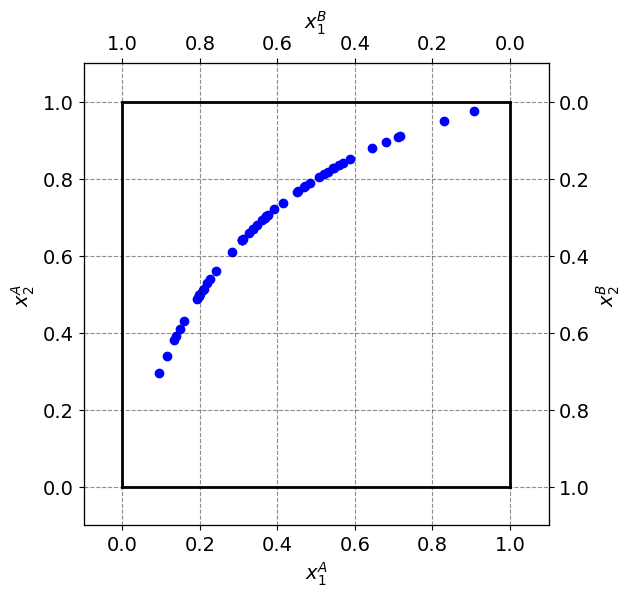

In [98]:
#Plotting the market equilibria in an edgeworth box
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting all pairs of (x1A, x2A) in the Edgeworth box
for x1A, x2A in equilibria:
    ax_A.scatter(x1A, x2A, marker='o', color='blue')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])